In [ ]:
#Required Libraries
import numpy as np  
from numpy.random import rand
import matplotlib.pyplot as plt

In [ ]:
#dataset
x = np.array(([0.9,0.8],[0.6,0.3],[0.9,0.1],[0.9,0.8]))  #Features
y = np.array(([0],[1],[1],[0]))  #Labels (0,1)

In [ ]:
# Activation function
def sigmoid(z):
    return 1/(1+np.exp(-z))

#Multi-layers feedforward neural network (2 hidden layers)
class NeuralNetwork:
    def __init__(self, x, y, nodes_in_layer1 = 4, nodes_in_layer2 = 3, nodes_in_layer3 = 1, l_rate = 1):
        #define x, y
        self.inputs_in_layer0 = x  #layer 0
        self.y = y
        
        self.l_rate = l_rate  #learning rate
        
        #define and set the number of neurons in each layers
        self.nodes_in_layer1 = nodes_in_layer1
        self.nodes_in_layer2 = nodes_in_layer2
        self.nodes_in_layer3 = nodes_in_layer3
        
        #intialize the wieghts (theta) metrices
        self.thetas_layer0 = np.random.rand(self.inputs_in_layer0.shape[1] + 1,self.nodes_in_layer1)  #shape: [2+1, 4]
        self.thetas_layer1 = np.random.rand(self.nodes_in_layer1 + 1,self.nodes_in_layer2)  #shape: [4+1, 3]
        self.thetas_layer2 = np.random.rand(self.nodes_in_layer2+1, nodes_in_layer3)  # shape: [3+1, 1]

    def feedforward(self):      
        #compute all the nodes (a1, a2, a3, a4) in layer1
        n = self.inputs_in_layer0.shape[0]

        self.Z1 = self.thetas_layer0[0] + np.dot(self.inputs_in_layer0, self.thetas_layer0[1:])
        self.layer1 = sigmoid(self.Z1)  #values of a1, a2, a3, a4 in layer 1
        
        #compute all the nodes (a1, a2, a3) in layer2
        self.Z2 = self.thetas_layer1[0] + np.dot(self.layer1, self.thetas_layer1[1:])
        self.layer2 = sigmoid(self.Z2)  #values of a1, a2, a3 in layer 2
        
        #compute all the nodes (a1) in layer3
        self.Z3 = self.thetas_layer2[0] + np.dot(self.layer2, self.thetas_layer2[1:])
        self.layer3 = sigmoid(self.Z3)  #output layer      
        
        return self.layer3
    
    def cost_func(self):
        
        self.n = self.inputs_in_layer0.shape[0] #number of training examples
        self.cost = (1/self.n) * np.sum(-self.y * np.log(self.layer3) - (1 - self.y) * np.log(1 - self.layer3)) #cross entropy
        return self.cost 

    
    def backprop(self):
        
        #dervative of E with respect to theta and bias in layer2
        self.dE_dlayer3 = (1/self.n) * (self.layer3-y)/(self.layer3*(1-self.layer3))
        self.dE_dZ3 = np.multiply(self.dE_dlayer3, (sigmoid(self.Z3)* (1-sigmoid(self.Z3))))
        self.dE_dtheta2 = np.dot(self.layer2.T, self.dE_dZ3)
        self.dE_dbias2 = np.dot(np.ones(self.n), self.dE_dZ3)
        
        #dervative of E with respect to theta and bias in layer1
        self.dE_dlayer2 = np.dot(self.dE_dZ3, self.thetas_layer2[1:].T)
        self.dE_dZ2 = np.multiply(self.dE_dlayer2, sigmoid(self.Z2)* (1-sigmoid(self.Z2)))
        self.dE_dtheta1 = np.dot(self.layer1.T, self.dE_dZ2)
        self.dE_dbias1 = np.dot(np.ones(self.n), self.dE_dZ2)
        
        #dervative of E with respect to theta and bias in layer0
        self.dE_dlayer1 = np.dot(self.dE_dZ2, self.thetas_layer1[1:].T)
        self.dE_dZ1 = np.multiply(self.dE_dlayer1, sigmoid(self.Z1)* (1-sigmoid(self.Z1)))
        self.dE_dtheta0 = np.dot(self.inputs_in_layer0.T, self.dE_dZ1)
        self.dE_dbias0 = np.dot(np.ones(self.n), self.dE_dZ1)
        
        #updating theta using gradient descent in layers 2, 1, and 0
        self.thetas_layer2[1:] = self.thetas_layer2[1:] - self.l_rate * self.dE_dtheta2
        self.thetas_layer1[1:] = self.thetas_layer1[1:] - self.l_rate * self.dE_dtheta1
        self.thetas_layer0[1:] = self.thetas_layer0[1:] - self.l_rate * self.dE_dtheta0
        
        #updating bias using gradient descent in layers 2, 1, and 0
        self.thetas_layer2[0] = self.thetas_layer2[0] - self.l_rate * self.dE_dbias2
        self.thetas_layer1[0] = self.thetas_layer1[0] - self.l_rate * self.dE_dbias1
        self.thetas_layer0[0] = self.thetas_layer0[0] - self.l_rate * self.dE_dbias0
        
        
        return self


dervative of E with respect to theta and bias in layer1
![bacprop1.png](attachment:bacprop1.png)
dervative of E with respect to theta and bias in layer1
![bacprop2.png](attachment:bacprop2.png)
dervative of E with respect to theta and bias in layer0
![bacprop3.png](attachment:bacprop3.png)

In [ ]:
NN = NeuralNetwork(x,y)
epochs = 1000
losses = []
for i in range(epochs):
    predicted_output = NN.feedforward()
    error = NN.cost_func()
    losses.append(error)
    NN.backprop()
    print ("iteration # ", i+1)
    print ("Actual Output: \n", y)
    print("Predicted Output: \n", predicted_output, "\n")
    print ("Cost: \n" , error, "\n")


iteration #  1
Actual Output: 
 [[0]
 [1]
 [1]
 [0]]
Predicted Output: 
 [[0.82606702]
 [0.82393041]
 [0.82481924]
 [0.82606702]] 

Cost: 
 0.971107671575558 

iteration #  2
Actual Output: 
 [[0]
 [1]
 [1]
 [0]]
Predicted Output: 
 [[0.62996023]
 [0.62847742]
 [0.62921621]
 [0.62996023]] 

Cost: 
 0.7290062799979775 

iteration #  3
Actual Output: 
 [[0]
 [1]
 [1]
 [0]]
Predicted Output: 
 [[0.53232622]
 [0.53156485]
 [0.53205912]
 [0.53232622]] 

Cost: 
 0.6957248174316015 

iteration #  4
Actual Output: 
 [[0]
 [1]
 [1]
 [0]]
Predicted Output: 
 [[0.50659002]
 [0.50604074]
 [0.50646005]
 [0.50659002]] 

Cost: 
 0.6935694080033028 

iteration #  5
Actual Output: 
 [[0]
 [1]
 [1]
 [0]]
Predicted Output: 
 [[0.50042101]
 [0.49992817]
 [0.50032804]
 [0.50042101]] 

Cost: 
 0.6934403257172856 

iteration #  6
Actual Output: 
 [[0]
 [1]
 [1]
 [0]]
Predicted Output: 
 [[0.49894703]
 [0.4984728 ]
 [0.49886693]
 [0.49894703]] 

Cost: 
 0.6934272577566286 

iteration #  7
Actual Output: 
 [[0

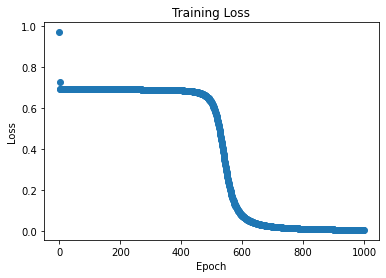

In [ ]:
plt.scatter(range(epochs), losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()